# Summary of Notebook: Chinook Salmon, Coho Salmon and Lake Trout focus

    --- There is a difference in length of each of these species noted via a regression line

# Scatterplots
    -- zooplankton type DAP: As years increased, DAP decreased
    -- as length increased, weight increased
    -- as number stocked increased, length increased
    -- 

## Greatest correlation between weight and length

### Creating categories in number_stocked was a helpful visual in a previous notebook
    -- From notebook with all species (just to help me remember details)
        --It looks like DNR has focused on stocking brown trout, chinook salmon, coho, lake trout, rainbow trout and walleye.
        -- Brown trout are highly stocked in Lake Huron and Michigan. Chinook salmon are highly stocked in Lakes Huron and Michigan. Coho is highly stocked in Lake Michigan. Lake trout, rainbow trout and walleye are highly stocked in all 4 lakes. 
        
# Categorical Plots (new categories were created for his dataframe)
    -in looking at length and weight, high stocking category shows increase in length and weight
    - Zooplankton PRED: no pattern noted when looking at categorical plot
    - Zooplankton CAL: High CAL category may be associated with increase length in these species of fish
    - Zooplankton CYC: Low CYC category may be associated with increased length in these species of fish
    - Zooplankton CYCIM: Low and average CYCIM categories may be associated with increased length in these species of fish
    - Zooplankton DAP: Low and average DAP categories may be associated with increased length in these species of fish
    - Zooplankton NDAP: High NDAP category may be associated with decreased length in these species of fish

# Violin Categorical Plot: 
    - Stocking numbers: Average stocking category may be associated with increased length in coho salmon
    - Chinook salmon are highly stocked in Lake Michigan. Coho salmon is average stocked in Lake Michigan. Lake trout are highly stocked in Lake Huron, Lake Michigna and Lake Superior. 
    - Zooplankton PRED: Predatory cladocerans: No association with length when looking at each species of fish
    - Zooplankton CAL: Calanoid copepod adults: No association with length when looking at each species of fish
    - Zooplankton CALIM: Calanoid copepod copepodites: High category seems to be associated with decreased length in coho salmon
    - Zooplankton CYC: Cyclopoid copepod adults: High category seems to be associated with decreased length in coho salmon
    - Zooplankton CYCIM: Cyclopoid copepod copepodites: High category seems to be associated with decreased length in coho salmon
    - Zooplankton DAP: Daphnia: High category seems to be associated with decreased length in coho salmon
    - Zooplankton NDAP: Non-daphnid herbivorous cladocerans: High category seems to be associated with decreased length in coho salmon
   
# Because I began focusing on just these species to see if I could learn more, I had to save this as a CSV with the new categories because the histograms changed. 
-- Saved as chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv

# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime as dt
import matplotlib

In [2]:
#checking version
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# Importing dataframe

In [4]:
#importing anglers/sizes/stocking/zooplankton
df_all = pd.read_csv(r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers\02 Data\Prepared\chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv', index_col=False)
path = r'C:\Users\Selena\Desktop\6-17-22 Michigan Anglers'
df_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv'), index_col=False)

# Checking Info and Making Changes

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2747 non-null   int64  
 1   category                 2747 non-null   object 
 2   species                  2747 non-null   object 
 3   waterbody                2747 non-null   object 
 4   lake                     2747 non-null   object 
 5   merge                    2747 non-null   object 
 6   datetime                 2747 non-null   object 
 7   date caught              2747 non-null   object 
 8   time caught              2747 non-null   object 
 9   year                     2747 non-null   int64  
 10  weight lbs               2747 non-null   float64
 11  length in                2747 non-null   float64
 12  method                   2747 non-null   object 
 13  bait                     2747 non-null   object 
 14  time hour caught        

In [6]:
#dropping unnamed column
df_all = df_all.drop('Unnamed: 0', axis=1)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 2747 non-null   object 
 1   species                  2747 non-null   object 
 2   waterbody                2747 non-null   object 
 3   lake                     2747 non-null   object 
 4   merge                    2747 non-null   object 
 5   datetime                 2747 non-null   object 
 6   date caught              2747 non-null   object 
 7   time caught              2747 non-null   object 
 8   year                     2747 non-null   int64  
 9   weight lbs               2747 non-null   float64
 10  length in                2747 non-null   float64
 11  method                   2747 non-null   object 
 12  bait                     2747 non-null   object 
 13  time hour caught         2747 non-null   int64  
 14  state minimum length in 

# Changing data types

In [8]:
#changing year and time hour caught datatype to int16
df_all['year'] = df_all['year'].astype("int16")

In [9]:
#changing data types
df_all[['category','species','waterbody','lake','method','bait']] = df_all[['category','species','waterbody','lake','method','bait']].astype("category")

In [10]:
#changing data types
df_all[['weight lbs','length in','state minimum length in','number_stocked', 'Average of CAL_Num/m3','Average of CALIM_Num/m3','Average of CYC_Num/m3','Average of CYCIM_Num/m3','Average of DAP_Num/m3','Average of NDAP_Num/m3','Average of PRED_Num/m3']]=df_all[['weight lbs','length in','state minimum length in','number_stocked', 'Average of CAL_Num/m3','Average of CALIM_Num/m3','Average of CYC_Num/m3','Average of CYCIM_Num/m3','Average of DAP_Num/m3','Average of NDAP_Num/m3','Average of PRED_Num/m3']].astype("float32")

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   category                 2747 non-null   category
 1   species                  2747 non-null   category
 2   waterbody                2747 non-null   category
 3   lake                     2747 non-null   category
 4   merge                    2747 non-null   object  
 5   datetime                 2747 non-null   object  
 6   date caught              2747 non-null   object  
 7   time caught              2747 non-null   object  
 8   year                     2747 non-null   int16   
 9   weight lbs               2747 non-null   float32 
 10  length in                2747 non-null   float32 
 11  method                   2747 non-null   category
 12  bait                     2747 non-null   category
 13  time hour caught         2747 non-null   int64   
 14  state mi

In [12]:
# convert column to datetime pandas
df_all['date caught'] = pd.to_datetime(df_all['date caught'])

In [13]:
# convert column to datetime pandas
df_all['datetime'] = pd.to_datetime(df_all['datetime'])

In [14]:
#changing time caught from the hint in the error
df_all['time caught'] = df_all['time caught'].astype(str)

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   category                 2747 non-null   category      
 1   species                  2747 non-null   category      
 2   waterbody                2747 non-null   category      
 3   lake                     2747 non-null   category      
 4   merge                    2747 non-null   object        
 5   datetime                 2747 non-null   datetime64[ns]
 6   date caught              2747 non-null   datetime64[ns]
 7   time caught              2747 non-null   object        
 8   year                     2747 non-null   int16         
 9   weight lbs               2747 non-null   float32       
 10  length in                2747 non-null   float32       
 11  method                   2747 non-null   category      
 12  bait                     2747 non-

In [16]:
df_all.head()

,category,species,waterbody,lake,merge,datetime,date caught,time caught,year,weight lbs,...,Average of PRED_Num/m3,stocked_category,PRED_category,CAL_category,CALIM_category,CALIM_category2,CYC_category,CYCIM_category,DAP_category,NDAP_category
0,Catch and Keep,chinook salmon,Lake Huron,HU,lk_huron,1997-09-18 14:35:00,1997-09-18,14:35:00,1997,28.750000,...,8.010978,High,Average,Average,High,High,Average,Average,High,Average
1,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,1997-07-25 13:00:00,1997-07-25,13:00:00,1997,38.380001,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
2,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,1997-07-20 13:55:00,1997-07-20,13:55:00,1997,29.500000,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
3,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,1997-07-24 13:30:00,1997-07-24,13:30:00,1997,25.500000,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low
4,Catch and Keep,lake trout,Lake Superior,SU,lk_sup,1997-08-31 08:00:00,1997-08-31,8:00:00,1997,22.809999,...,0.364413,High,Low,Low,Low,Low,Low,Average,Low,Low


# Checking more details of the dataframe

In [17]:
#checking shape
df_all.shape

(2747, 32)

In [18]:
# Check for missing values

df_all.isnull().sum()

category                   0
species                    0
waterbody                  0
lake                       0
merge                      0
datetime                   0
date caught                0
time caught                0
year                       0
weight lbs                 0
length in                  0
method                     0
bait                       0
time hour caught           0
state minimum length in    0
number_stocked             0
Average of CAL_Num/m3      0
Average of CALIM_Num/m3    0
Average of CYC_Num/m3      0
Average of CYCIM_Num/m3    0
Average of DAP_Num/m3      0
Average of NDAP_Num/m3     0
Average of PRED_Num/m3     0
stocked_category           0
PRED_category              0
CAL_category               0
CALIM_category             0
CALIM_category2            0
CYC_category               0
CYCIM_category             0
DAP_category               0
NDAP_category              0
dtype: int64

In [19]:
# Find duplicates
df_dups = df_all[df_all.duplicated()]

In [20]:
df_dups.shape

(0, 32)

#no duplicates

In [21]:
#looking for mixed datatypes
for col in df_all.columns.tolist():
      weird = (df_all[[col]].applymap(type) != df_all[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_all[weird]) > 0:
        print (col)

#no mixed data types

# Looking for correlations

In [22]:
# Create a correlation matrix using pandas

df_all.corr()

,year,weight lbs,length in,time hour caught,state minimum length in,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3
year,1.000000,0.331303,0.298230,0.150203,0.304742,-0.399436,-0.100152,-0.353940,-0.443532,-0.461671,-0.795173,-0.521677,0.361677
weight lbs,0.331303,1.000000,0.897814,0.132681,0.909657,0.470794,0.373000,-0.043598,-0.504491,-0.485616,-0.422510,-0.447548,0.245923
length in,0.298230,0.897814,1.000000,0.129088,0.837850,0.456895,0.344492,-0.056496,-0.529650,-0.509618,-0.434658,-0.460786,0.225165
time hour caught,0.150203,0.132681,0.129088,1.000000,0.117515,-0.010996,0.041707,-0.010566,-0.092228,-0.090682,-0.135158,-0.103464,0.043641
state minimum length in,0.304742,0.909657,0.837850,0.117515,1.000000,0.456795,0.476067,0.050429,-0.423017,-0.395933,-0.331193,-0.387015,0.322043
number_stocked,-0.399436,0.470794,0.456895,-0.010996,0.456795,1.000000,0.473645,0.181873,-0.323210,-0.292941,0.156151,-0.105156,-0.169632
Average of CAL_Num/m3,-0.100152,0.373000,0.344492,0.041707,0.476067,0.473645,1.000000,0.591756,-0.281710,-0.192472,0.033704,-0.127204,0.164859
Average of CALIM_Num/m3,-0.353940,-0.043598,-0.056496,-0.010566,0.050429,0.181873,0.591756,1.000000,0.296265,0.432078,0.278358,0.251050,-0.046449
Average of CYC_Num/m3,-0.443532,-0.504491,-0.529650,-0.092228,-0.423017,-0.323210,-0.281710,0.296265,1.000000,0.959510,0.697070,0.604593,-0.137461
Average of CYCIM_Num/m3,-0.461671,-0.485616,-0.509618,-0.090682,-0.395933,-0.292941,-0.192472,0.432078,0.959510,1.000000,0.685948,0.584368,-0.104917


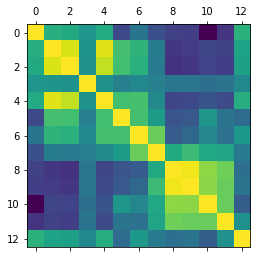

In [23]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_all.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

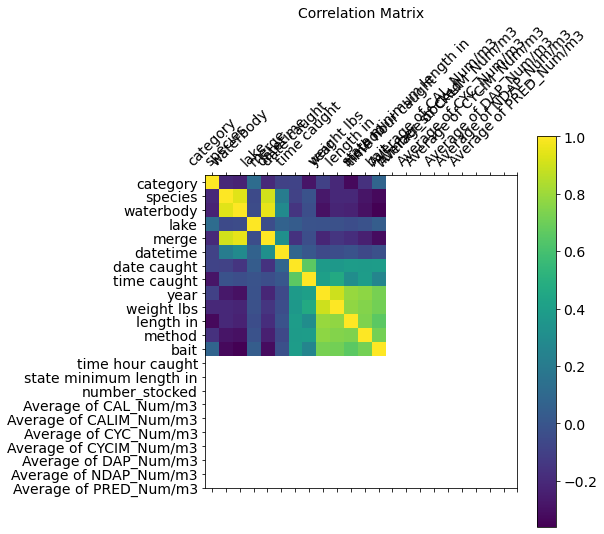

In [24]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(df_all.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all.shape[1]), df_all.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_all.shape[1]), df_all.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

#this didn't work

In [24]:
df_all.columns

Index(['category', 'species', 'waterbody', 'lake', 'merge', 'datetime',
       'date caught', 'time caught', 'year', 'weight lbs', 'length in',
       'method', 'bait', 'time hour caught', 'state minimum length in',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3', 'stocked_category', 'PRED_category',
       'CAL_category', 'CALIM_category', 'CALIM_category2', 'CYC_category',
       'CYCIM_category', 'DAP_category', 'NDAP_category'],
      dtype='object')

In [25]:
# Create a subset

sub = df_all[['year', 'species', 'waterbody','weight lbs', 'length in',
       'time hour caught',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3']]

In [26]:
sub

,year,species,waterbody,weight lbs,length in,time hour caught,number_stocked,Average of CAL_Num/m3,Average of CALIM_Num/m3,Average of CYC_Num/m3,Average of CYCIM_Num/m3,Average of DAP_Num/m3,Average of NDAP_Num/m3,Average of PRED_Num/m3
0,1997,chinook salmon,Lake Huron,28.750000,40.000000,14,6672382.0,1361.952026,4339.344727,612.466614,2576.439209,2191.528809,843.755676,8.010978
1,1997,lake trout,Lake Superior,38.380001,43.000000,13,3760410.0,416.114380,1320.778564,112.298706,558.610962,41.561607,53.417912,0.364413
2,1997,lake trout,Lake Superior,29.500000,41.000000,13,3760410.0,416.114380,1320.778564,112.298706,558.610962,41.561607,53.417912,0.364413
3,1997,lake trout,Lake Superior,25.500000,42.000000,13,3760410.0,416.114380,1320.778564,112.298706,558.610962,41.561607,53.417912,0.364413
4,1997,lake trout,Lake Superior,22.809999,42.000000,8,3760410.0,416.114380,1320.778564,112.298706,558.610962,41.561607,53.417912,0.364413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,2019,lake trout,Lake Michigan,22.980000,34.130001,9,2906739.0,790.883301,1410.258423,597.991638,1807.909546,44.702732,173.392548,14.465708
2743,2019,lake trout,Lake Michigan,22.980000,35.000000,7,2906739.0,790.883301,1410.258423,597.991638,1807.909546,44.702732,173.392548,14.465708
2744,2019,lake trout,Lake Erie,22.980000,35.000000,10,2906739.0,2451.749268,3161.735107,2530.455566,3857.070312,2260.997070,2205.742676,45.003391
2745,2019,chinook salmon,Lake Michigan,29.450001,40.380001,19,1131834.0,790.883301,1410.258423,597.991638,1807.909546,44.702732,173.392548,14.465708


<AxesSubplot:>

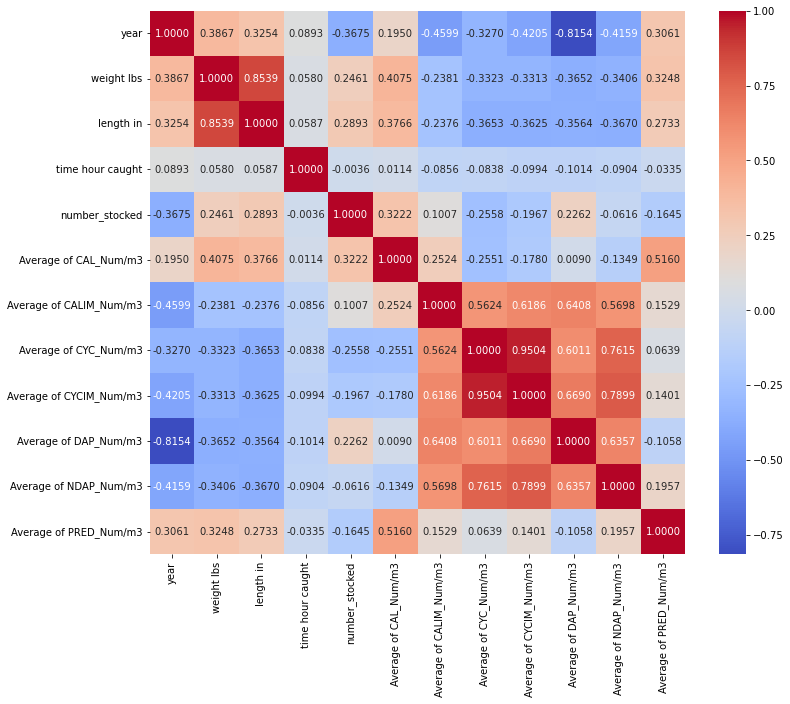

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
sns.heatmap(sub.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=True, ax=ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

# Scatterplot

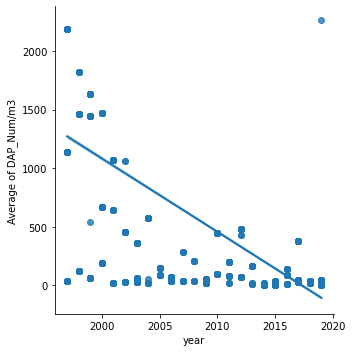

In [28]:
# Create a scatterplot for year and DAP columns in seaborn

sns.lmplot(x = 'year', y = 'Average of DAP_Num/m3', data = df_all)

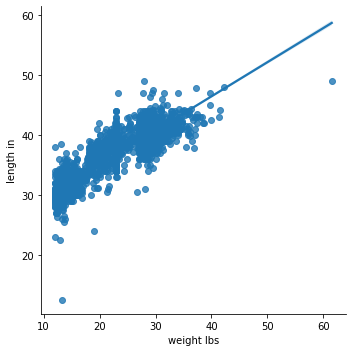

In [29]:
# Create a scatterplot for weight and length columns in seaborn

sns.lmplot(x = 'weight lbs', y = 'length in', data = df_all)

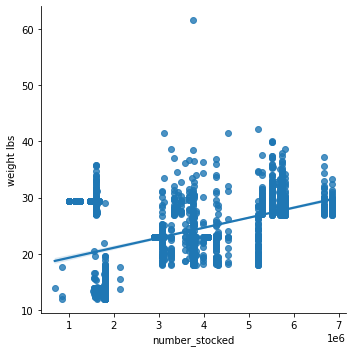

In [30]:
# Create a scatterplot for weight and number_stocked columns in seaborn

sns.lmplot(x = 'number_stocked', y = 'weight lbs', data = df_all)

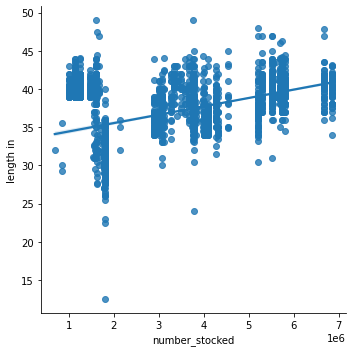

In [31]:
# Create a scatterplot for length and number_stocked columns in seaborn

sns.lmplot(x = 'number_stocked', y = 'length in', data = df_all)

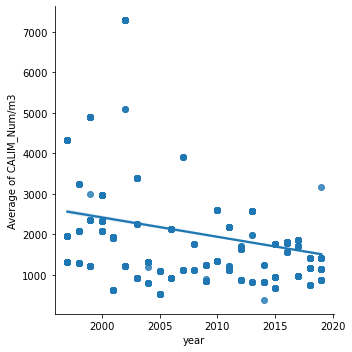

In [32]:
# Create a scatterplot for year and Average of CALIM_Num/m3 columns in seaborn

sns.lmplot(x = 'year', y = 'Average of CALIM_Num/m3', data = df_all)

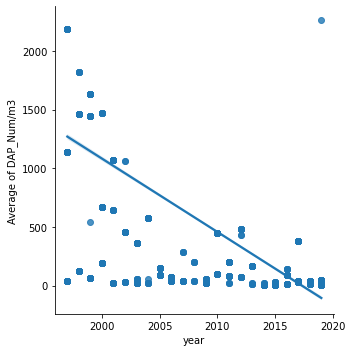

In [33]:
# Create a scatterplot for year and Average of DAP_Num/m3 columns in seaborn

sns.lmplot(x = 'year', y = 'Average of DAP_Num/m3', data = df_all)

# Pair plots

In [34]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['year', 'weight lbs', 'length in',
       'number_stocked', 'Average of CALIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3']]

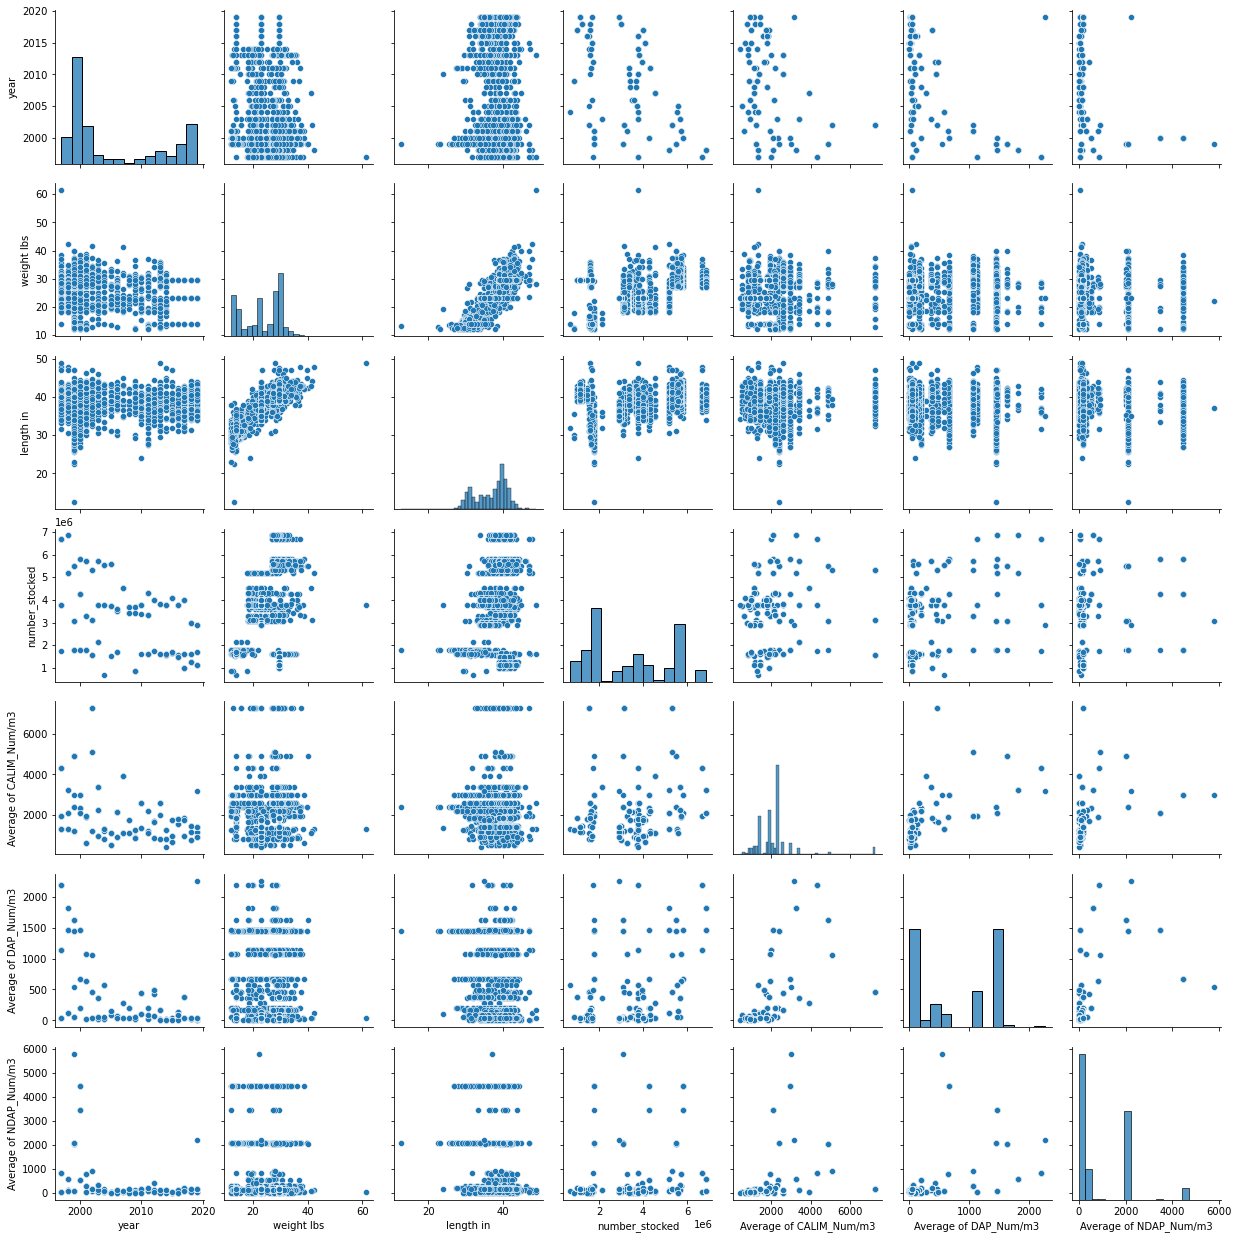

In [35]:
# create pair plot

g = sns.pairplot(sub_2)

# Checking different pairings in the pair plot

In [36]:
#Other variables

sub_3 = sub[['Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3']]

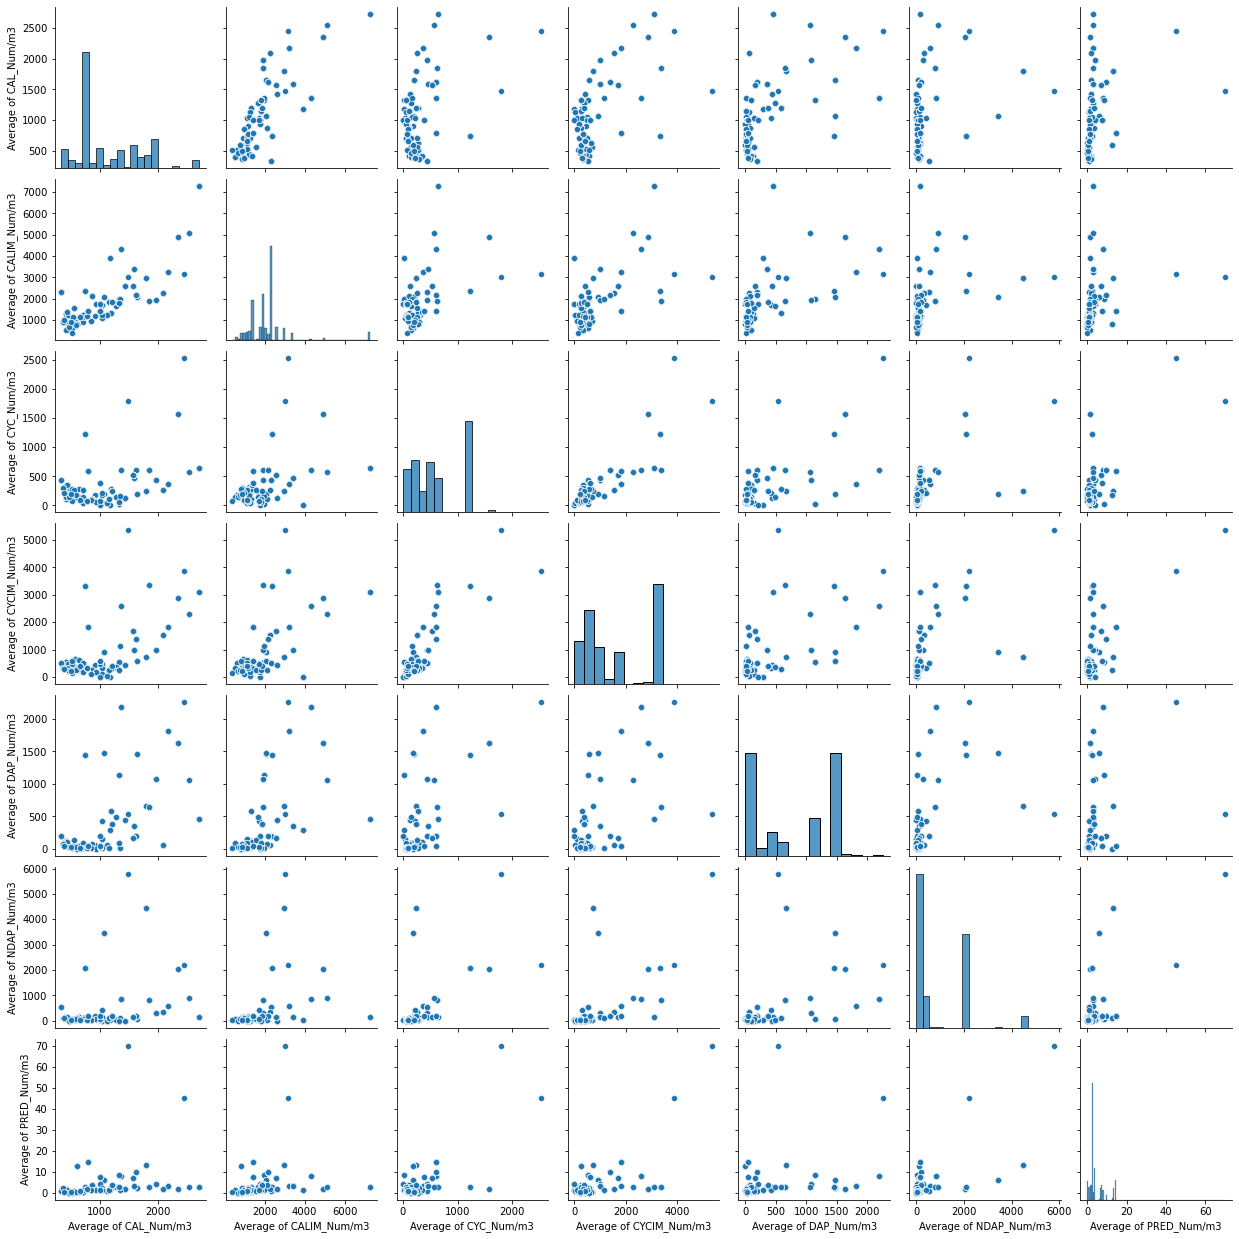

In [37]:
# create pair plot

g2 = sns.pairplot(sub_3)

# Categorical Plots

<AxesSubplot:xlabel='number_stocked', ylabel='Count'>

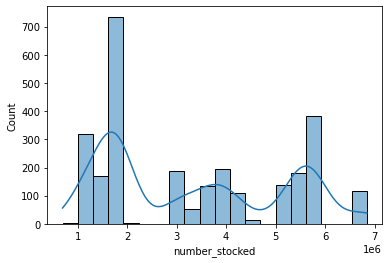

In [38]:
# Use a histogram to visualize the distribution of the household income. 
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['number_stocked'], bins = 20, kde = True)

In [39]:
#setting up categories
df_all.loc[df_all['number_stocked'] < 2000000, 'stocked_category'] = 'Low'

In [40]:
df_all.loc[(df_all['number_stocked'] >= 2000000) & (df_all['number_stocked'] < 4000000), 'stocked_category'] = 'Average'

In [41]:
df_all.loc[df_all['number_stocked'] >= 4000000, 'stocked_category'] = 'High'

In [42]:
#seeing the number of values in each category
df_all['stocked_category'].value_counts(dropna = False)

Low        1228
High        993
Average     526
Name: stocked_category, dtype: int64

In [43]:
#seeing the columns with the change
df_all.columns

Index(['category', 'species', 'waterbody', 'lake', 'merge', 'datetime',
       'date caught', 'time caught', 'year', 'weight lbs', 'length in',
       'method', 'bait', 'time hour caught', 'state minimum length in',
       'number_stocked', 'Average of CAL_Num/m3', 'Average of CALIM_Num/m3',
       'Average of CYC_Num/m3', 'Average of CYCIM_Num/m3',
       'Average of DAP_Num/m3', 'Average of NDAP_Num/m3',
       'Average of PRED_Num/m3', 'stocked_category', 'PRED_category',
       'CAL_category', 'CALIM_category', 'CALIM_category2', 'CYC_category',
       'CYCIM_category', 'DAP_category', 'NDAP_category'],
      dtype='object')

In [44]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   category                 2747 non-null   category      
 1   species                  2747 non-null   category      
 2   waterbody                2747 non-null   category      
 3   lake                     2747 non-null   category      
 4   merge                    2747 non-null   object        
 5   datetime                 2747 non-null   datetime64[ns]
 6   date caught              2747 non-null   datetime64[ns]
 7   time caught              2747 non-null   object        
 8   year                     2747 non-null   int16         
 9   weight lbs               2747 non-null   float32       
 10  length in                2747 non-null   float32       
 11  method                   2747 non-null   category      
 12  bait                     2747 non-

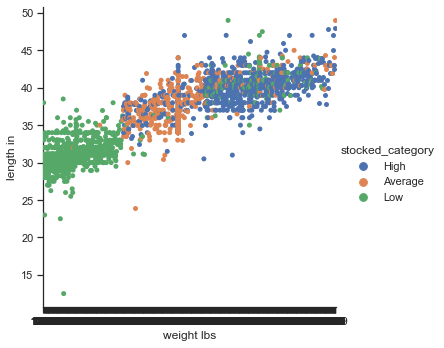

In [45]:
# Create a categorical plot in seaborn using the stocked categories created above

sns.set(style="ticks")
g3 = sns.catplot(x="weight lbs", y="length in", hue="stocked_category", data=df_all)

# It appears species that have been highly stocked have higher weight and length

<AxesSubplot:xlabel='Average of PRED_Num/m3', ylabel='Count'>

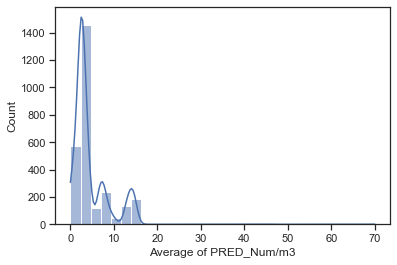

In [46]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of PRED_Num/m3'], bins = 30, kde = True)

In [55]:
#setting up categories
df_all.loc[df_all['Average of PRED_Num/m3'] < 3, 'PRED_category'] = 'Low'

In [56]:
df_all.loc[(df_all['Average of PRED_Num/m3'] >= 3) & (df_all['Average of PRED_Num/m3'] < 5), 'PRED_category'] = 'Average'

In [57]:
df_all.loc[df_all['Average of PRED_Num/m3'] >= 5, 'PRED_category'] = 'High'

In [58]:
#seeing the number of values in each category
df_all['PRED_category'].value_counts(dropna = False)

Low        1667
High        720
Average     360
Name: PRED_category, dtype: int64

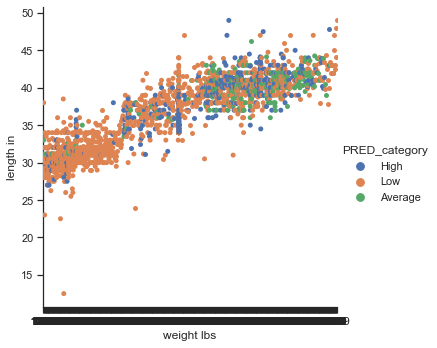

In [59]:
# Create a categorical plot in seaborn using the PRED categories created above
# seeing if Predatory cladocerans affect length and size

sns.set(style="ticks")
g4 = sns.catplot(x="weight lbs", y="length in", hue="PRED_category", data=df_all)

# It appears that having a high PRED in the water, may not be a factor in length of these species.

<AxesSubplot:xlabel='Average of CAL_Num/m3', ylabel='Count'>

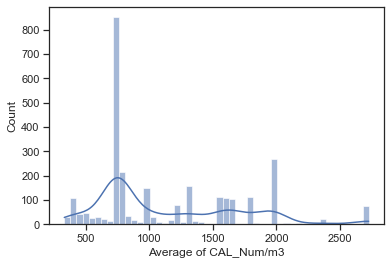

In [60]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CAL_Num/m3'], bins = 50, kde = True)

In [61]:
#setting up categories
df_all.loc[df_all['Average of CAL_Num/m3'] < 750, 'CAL_category'] = 'Low'

In [62]:
df_all.loc[(df_all['Average of CAL_Num/m3'] >= 750) & (df_all['Average of CAL_Num/m3'] < 1500), 'CAL_category'] = 'Average'

In [63]:
df_all.loc[df_all['Average of CAL_Num/m3'] >= 1500, 'CAL_category'] = 'High'

In [64]:
#seeing the number of values in each category
df_all['CAL_category'].value_counts(dropna = False)

Low        1171
High        819
Average     757
Name: CAL_category, dtype: int64

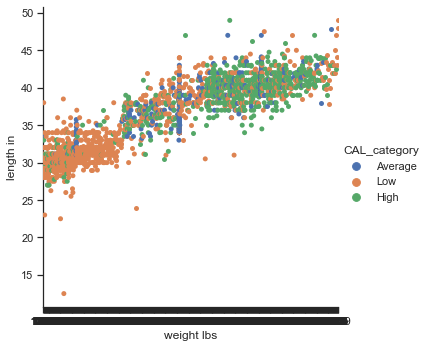

In [65]:
# Create a categorical plot in seaborn using the CAL categories created above
# seeing if Calanoid copepod affect length and size

sns.set(style="ticks")
g5 = sns.catplot(x="weight lbs", y="length in", hue="CAL_category", data=df_all)

# It kind of appears high CAL category may be associated with longer length for fish of these species.

<AxesSubplot:xlabel='Average of CALIM_Num/m3', ylabel='Count'>

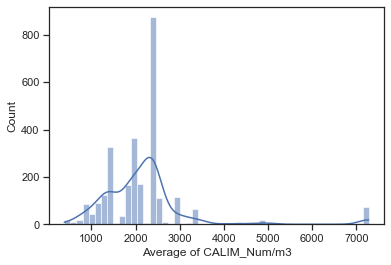

In [66]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CALIM_Num/m3'], bins = 50, kde = True)

In [67]:
#setting up categories
df_all.loc[df_all['Average of CALIM_Num/m3'] < 1700, 'CALIM_category'] = 'Low'

In [68]:
df_all.loc[(df_all['Average of CALIM_Num/m3'] >= 1700) & (df_all['Average of CALIM_Num/m3'] < 21000), 'CALIM_category'] = 'Average'

In [69]:
df_all.loc[df_all['Average of CALIM_Num/m3'] >= 2100, 'CALIM_category'] = 'High'

In [70]:
#seeing the number of values in each category
df_all['CALIM_category'].value_counts(dropna = False)

High       1357
Low         725
Average     665
Name: CALIM_category, dtype: int64

# I created the category in the event I need it. I know from the correlation plot that I doubt anything will be seen by viewing a categorical plot.

# I just remembered that the species of fish will contribute to length of fish.

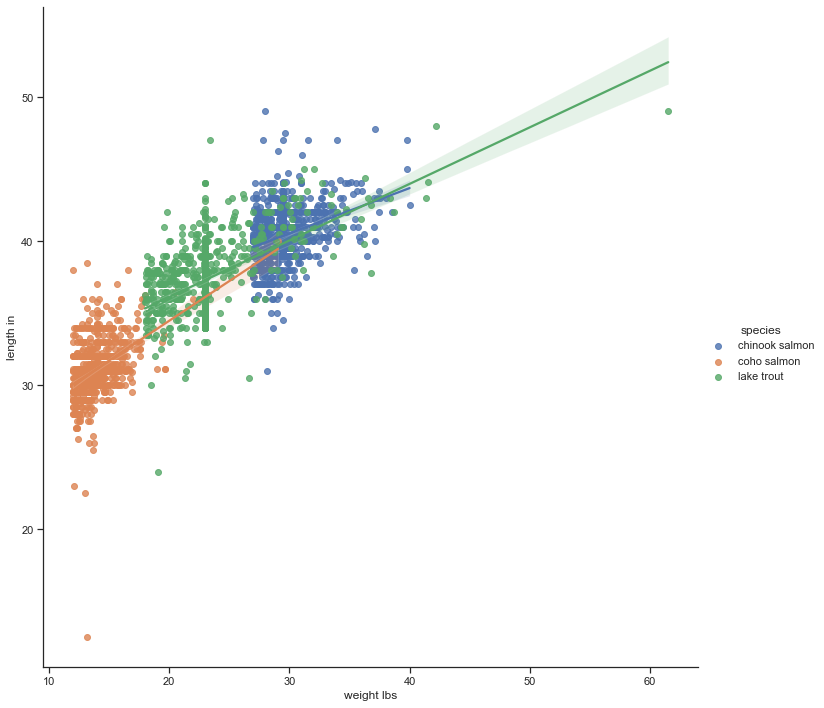

In [71]:
# add regression line per group Seaborn
sns.lmplot(x="weight lbs", 
           y="length in", 
           hue="species",
           data=df_all,
           height=10)
plt.xlabel("weight lbs")
plt.ylabel("length in")
plt.savefig("species_regression_line.png",
                    format='png',dpi=400)

# There is a difference in length in these species. Coho salmon has the least length and chinook salmon has the greatest length.

<AxesSubplot:xlabel='Average of CYC_Num/m3', ylabel='Count'>

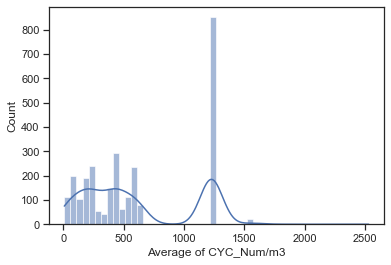

In [72]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CYC_Num/m3'], bins = 50, kde = True)

In [81]:
#setting up categories
df_all.loc[df_all['Average of CYC_Num/m3'] < 300, 'CYC_category'] = 'Low'

In [82]:
df_all.loc[(df_all['Average of CYC_Num/m3'] >= 300) & (df_all['Average of CYC_Num/m3'] < 600), 'CYC_category'] = 'Average'

In [83]:
df_all.loc[df_all['Average of CYC_Num/m3'] >= 600, 'CYC_category'] = 'High'

In [84]:
#seeing the number of values in each category
df_all['CYC_category'].value_counts(dropna = False)

High       1007
Low         896
Average     844
Name: CYC_category, dtype: int64

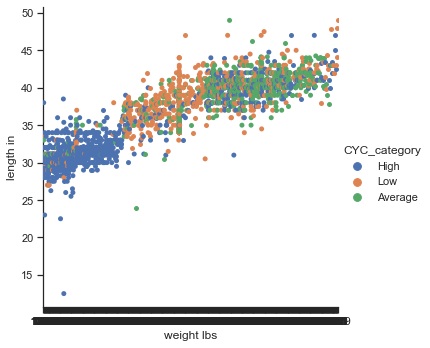

In [85]:
# Create a categorical plot in seaborn using the CYC categories created above
# seeing if Cyclopoid copepod affect length and size with only options of high and low

sns.set(style="ticks")
g8 = sns.catplot(x="weight lbs", y="length in", hue="CYC_category", data=df_all)

# It looks like low CYC results in increased length in these species of fish.

<AxesSubplot:xlabel='Average of CYCIM_Num/m3', ylabel='Count'>

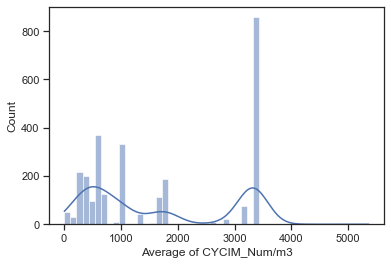

In [86]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of CYCIM_Num/m3'], bins = 50, kde = True)

In [91]:
#setting up categories
df_all.loc[df_all['Average of CYCIM_Num/m3'] < 600, 'CYCIM_category'] = 'Low'

In [92]:
df_all.loc[(df_all['Average of CYCIM_Num/m3'] >= 600) & (df_all['Average of CYCIM_Num/m3'] < 2000), 'CYCIM_category'] = 'Average'

In [93]:
df_all.loc[df_all['Average of CYCIM_Num/m3'] >= 2000, 'CYCIM_category'] = 'High'

In [94]:
#seeing the number of values in each category
df_all['CYCIM_category'].value_counts(dropna = False)

High       966
Low        958
Average    823
Name: CYCIM_category, dtype: int64

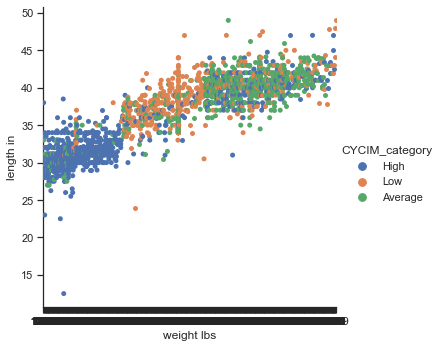

In [95]:
# Create a categorical plot in seaborn using the CYCIM categories created above
# seeing if Cyclopoid copepod copepodites affect length and size

sns.set(style="ticks")
g8 = sns.catplot(x="weight lbs", y="length in", hue="CYCIM_category", data=df_all)

# It appears that low and average CYCIM results in greater length of fish of these species.

<AxesSubplot:xlabel='Average of DAP_Num/m3', ylabel='Count'>

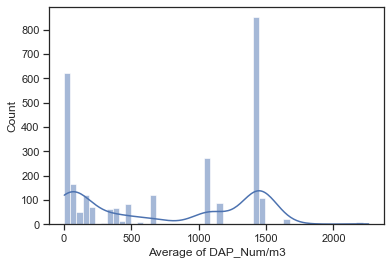

In [96]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of DAP_Num/m3'], bins = 50, kde = True)

In [97]:
#setting up categories
df_all.loc[df_all['Average of DAP_Num/m3'] < 200, 'DAP_category'] = 'Low'

In [98]:
df_all.loc[(df_all['Average of DAP_Num/m3'] >= 200) & (df_all['Average of DAP_Num/m3'] < 1200), 'DAP_category'] = 'Average'

In [99]:
df_all.loc[df_all['Average of DAP_Num/m3'] >= 1200, 'DAP_category'] = 'High'

In [100]:
#seeing the number of values in each category
df_all['DAP_category'].value_counts(dropna = False)

High       998
Low        980
Average    769
Name: DAP_category, dtype: int64

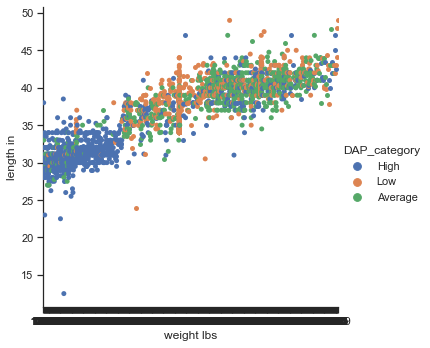

In [101]:
# Create a categorical plot in seaborn using the DAP categories created above
# seeing if Daphnia affect length and size

sns.set(style="ticks")
g9 = sns.catplot(x="weight lbs", y="length in", hue="DAP_category", data=df_all)

# It appears that low and average DAP may be a factor in increased length in these species of fish

<AxesSubplot:xlabel='Average of NDAP_Num/m3', ylabel='Count'>

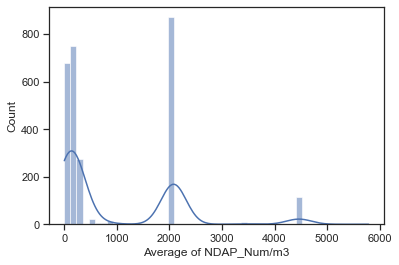

In [102]:
#Creating a histogram
# This will help create categories for ranges. 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Average of NDAP_Num/m3'], bins = 50, kde = True)

In [111]:
#setting up categories
df_all.loc[df_all['Average of NDAP_Num/m3'] < 150, 'NDAP_category'] = 'Low'

In [112]:
df_all.loc[(df_all['Average of NDAP_Num/m3'] >= 150) & (df_all['Average of NDAP_Num/m3'] < 1800), 'NDAP_category'] = 'Average'

In [113]:
df_all.loc[df_all['Average of NDAP_Num/m3'] >= 1800, 'NDAP_category'] = 'High'

In [114]:
#seeing the number of values in each category
df_all['NDAP_category'].value_counts(dropna = False)

High       994
Low        896
Average    857
Name: NDAP_category, dtype: int64

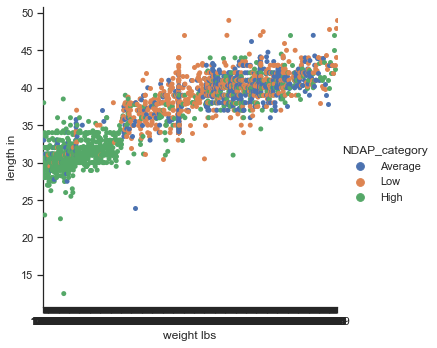

In [115]:
# Create a categorical plot in seaborn using the NDAP categories created above
# seeing if Non-daphnid herbivorous cladocerans affect length and size

sns.set(style="ticks")
g10 = sns.catplot(x="weight lbs", y="length in", hue="NDAP_category", data=df_all)

# It appears that high NDAP is more likely to have decreased length of fish in these species.

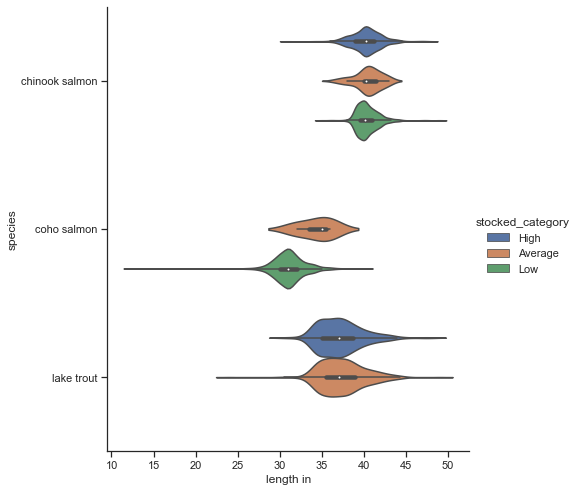

In [117]:
# Creating a categorical plot in seaborn
g11 = sns.catplot(x="length in", y="species",
                hue="stocked_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCLT_violin_stocked_length.png')

# It looks like DNR focused on chinook salmon and lake trout. It also appears that coho salmon have increased length with average stocking numbers.

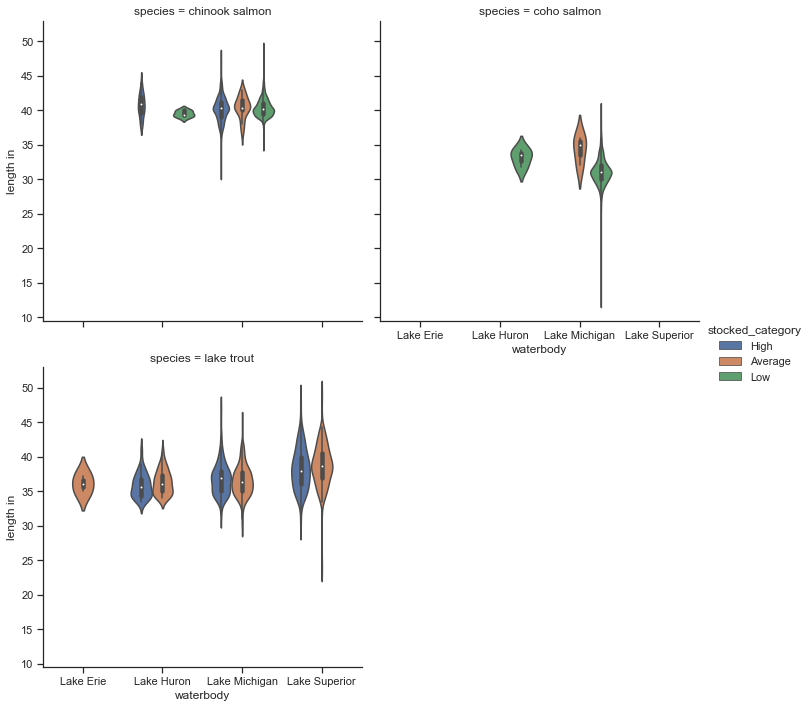

In [120]:
# Creating a categorical plot in seaborn
g12 = sns.catplot(x="waterbody", y="length in",
                  col="species", col_wrap=2,
                hue="stocked_category",
                data=df_all,
                height=5, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_waterbody_length.png')

# Chinook salmon are highly stocked in Lake Michigan. Coho salmon is average stocked in Lake Michigan. Lake trout are highly stocked in Lake Huron, Lake Michigna and Lake Superior. 

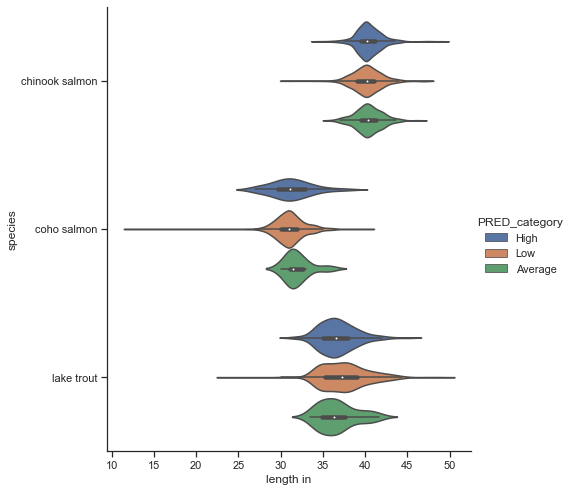

In [121]:
# Creating a categorical plot in seaborn
g13 = sns.catplot(x="length in", y="species",
                hue="PRED_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_PRED_length.png')

# Predatory cladocerans: It does not appear that this zooplankton has a relationship with length when looking at each species of fish.

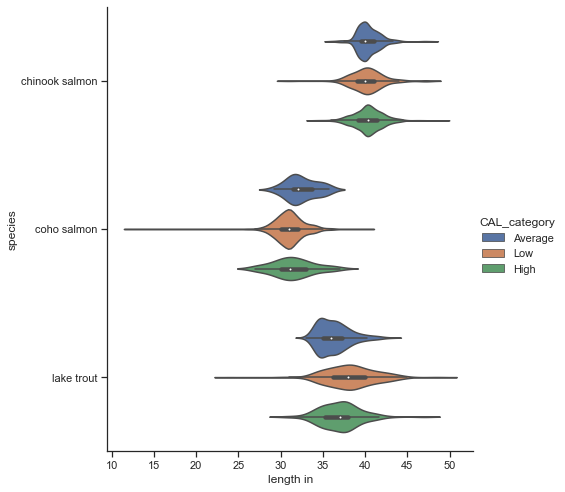

In [122]:
# Creating a categorical plot in seaborn
g14 = sns.catplot(x="length in", y="species",
                hue="CAL_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_CAL_length.png')

# Calanoid copepod adults: It does not appear that this zooplankton has a relationship with length when looking at each species of fish.

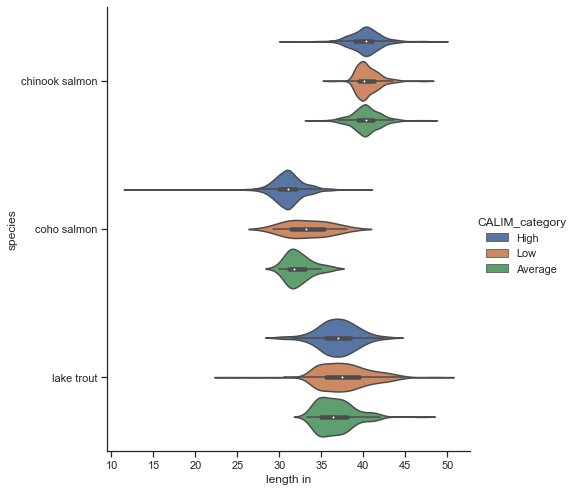

In [123]:
# Creating a categorical plot in seaborn
g15 = sns.catplot(x="length in", y="species",
                hue="CALIM_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_CALIM_length.png')

# Calanoid copepod copepodites: High category seems to have shorter coho salmon.

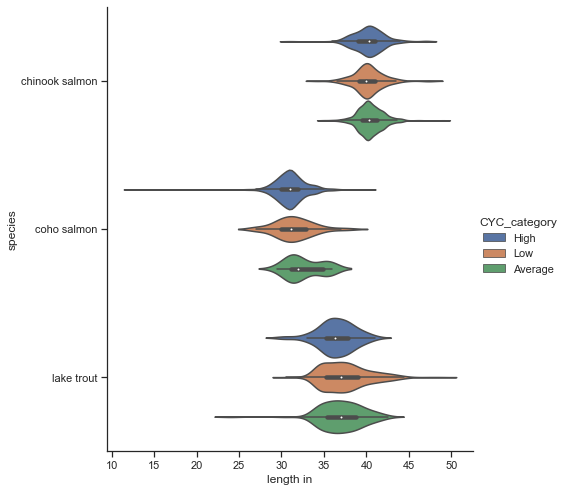

In [124]:
# Creating a categorical plot in seaborn
g16 = sns.catplot(x="length in", y="species",
                hue="CYC_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_CYC_length.png')

# Cyclopoid copepod adults: High category seems to have a shorter length in coho salmon.

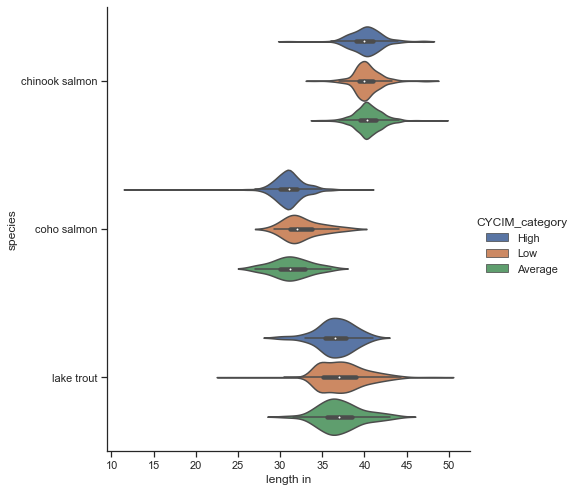

In [125]:
# Creating a categorical plot in seaborn
g17 = sns.catplot(x="length in", y="species",
                hue="CYCIM_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_CYCIM_length.png')

# Cyclopoid copepod copepodites: High category seems to be associated with shorter length in coho salmon.

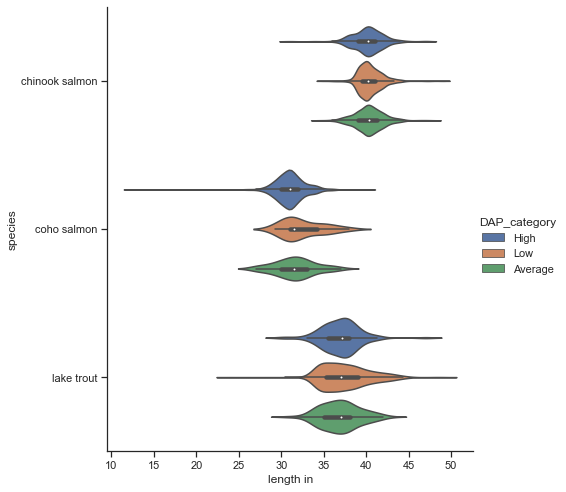

In [126]:
# Creating a categorical plot in seaborn
g18 = sns.catplot(x="length in", y="species",
                hue="DAP_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_DAP_length.png')

# Daphnia: High category may be associated with shorter length coho salmon.

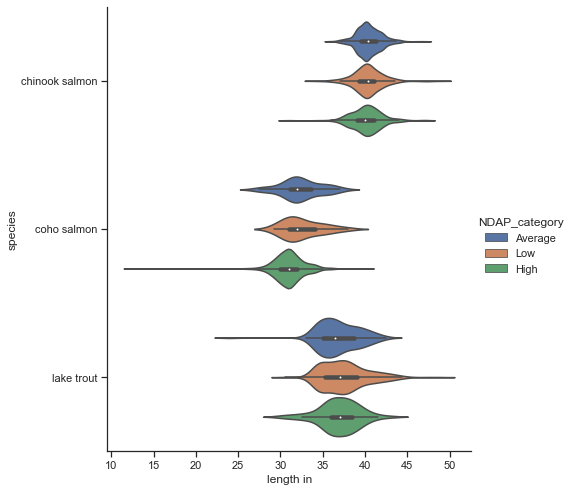

In [127]:
# Creating a categorical plot in seaborn
g19 = sns.catplot(x="length in", y="species",
                hue="NDAP_category",
                data=df_all,
                orient="h", height=7, aspect=1,
                kind="violin", dodge=True)
plt.savefig('CCT_violin_NDAP_length.png')

# Non-daphnid herbivorous cladocerans: High category may be associated with shorter length coho salmon.

In [128]:
#exporting the categories as a csv - I had to do this because I changed the categories for the zooplankton based on this dataset
df_all.to_csv(os.path.join(path, '02 Data','Prepared', 'chinook_coho_lake_cleaned_categories_anglers_size_stocking_plankton_combined.csv'))